# Predicting Pass Completion

## Data Preprocessing

In [1]:
from statsbombpy import sb
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Grabbing all matches for Chelsea F.C. for the 2015/16 season

In [3]:
premier_league_id = 2
season_1516_id = 27
team = 'Chelsea'

In [4]:
competions = sb.competitions()
pl = competions[competions['competition_id'] == premier_league_id].reset_index(drop=True)
pl = pl[pl['season_id'] == season_1516_id].reset_index(drop=True)
pl_matches = sb.matches(competition_id=premier_league_id, season_id=season_1516_id)
matches = pl_matches[(pl_matches['home_team'] == team) | (pl_matches['away_team'] == team)].reset_index(drop=True)
matches.sort_values(by='match_week', inplace=True)
matches.reset_index(drop=True, inplace=True)


In [5]:
matches[['match_date', 'match_week', 'home_team', 'away_team', 'season']].head(2)

,match_date,match_week,home_team,away_team,season
0,2015-08-08,1,Chelsea,Swansea City,2015/2016
1,2015-08-16,2,Manchester City,Chelsea,2015/2016


In [6]:
matches[['match_date', 'match_week', 'home_team', 'away_team', 'season']].tail(2)

,match_date,match_week,home_team,away_team,season
36,2016-05-07,37,Sunderland,Chelsea,2015/2016
37,2016-05-15,38,Chelsea,Leicester City,2015/2016


### Extracting all pass events for every Chelsea match in 2015/16

In [16]:
import pandas as pd

In [8]:
pass_features = ['player', 'player_id', 'position', 'possession_team',
                'location', 'pass_end_location', 'play_pattern',
                'pass_body_part', 'pass_angle', 'pass_height', 'pass_length', 'under_pressure',
                'pass_cross', 'pass_cut_back', 'pass_inswinging', 'pass_outswinging', 'pass_through_ball', 'pass_switch',
                'pass_outcome', 'type']

In [9]:
def sort_events(events):
    events.sort_values(by=['period', 'timestamp'], inplace=True)
    events.reset_index(drop=True, inplace=True)
    first_half = events[events['period'] == 1]
    first_half.sort_values(by='timestamp', inplace=True)
    first_half.reset_index(drop=True, inplace=True)
    second_half = events[events['period'] == 2]
    second_half.sort_values(by='timestamp', inplace=True)
    second_half.reset_index(drop=True, inplace=True)
    events = pd.concat([first_half, second_half])
    events.reset_index(drop=True, inplace=True)
    return events

In [10]:
events_dfs = []
for index, row in matches.iterrows():
    match_id = row['match_id']
    events = sb.events(match_id=match_id)
    events = sort_events(events)
    events_dfs.append(events)
events = pd.concat(events_dfs, ignore_index=True)
events = events[pass_features]
events = events[(events['type'] == 'Pass') & (events['possession_team'] == team)].reset_index(drop=True)
    

In [11]:
events

,player,player_id,position,possession_team,location,pass_end_location,play_pattern,pass_body_part,pass_angle,pass_height,pass_length,under_pressure,pass_cross,pass_cut_back,pass_inswinging,pass_outswinging,pass_through_ball,pass_switch,pass_outcome,type
0,Eden Hazard,3621.0,Left Wing,Chelsea,"[42.7, 36.1]","[35.4, 48.6]",Regular Play,Right Foot,2.099368,Low Pass,14.475496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
1,Francesc Fàbregas i Soler,3478.0,Right Center Midfield,Chelsea,"[34.3, 46.1]","[46.4, 30.6]",Regular Play,Right Foot,-0.907969,Ground Pass,19.663671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
2,Oscar dos Santos Emboaba Júnior,40122.0,Center Attacking Midfield,Chelsea,"[47.4, 30.4]","[56.0, 43.6]",Regular Play,Right Foot,0.993357,Ground Pass,15.754364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
3,Eden Hazard,3621.0,Left Wing,Chelsea,"[77.7, 44.3]","[92.5, 69.0]",Regular Play,Right Foot,1.030972,Ground Pass,28.794617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
4,Branislav Ivanović,5594.0,Right Back,Chelsea,"[95.2, 69.0]","[108.9, 59.2]",Regular Play,Right Foot,-0.620940,Ground Pass,16.844286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21379,Tammy Bakumo-Abraham,3440.0,Center Forward,Chelsea,"[52.4, 5.6]","[52.4, 11.1]",Regular Play,Head,1.570796,Low Pass,5.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
21380,Francesc Fàbregas i Soler,3478.0,Right Center Midfield,Chelsea,"[52.6, 11.4]","[76.4, 7.8]",Regular Play,Right Foot,-0.150122,Ground Pass,24.070728,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
21381,Thibaut Courtois,3509.0,Goalkeeper,Chelsea,"[20.1, 5.4]","[83.8, 23.3]",From Free Kick,Left Foot,0.273940,High Pass,66.167210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
21382,Abdul Rahman Baba,12325.0,Left Back,Chelsea,"[50.7, 0.1]","[55.7, 3.7]",From Throw In,NaN,0.624023,Low Pass,6.161169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass


### Cleaning data

In [12]:
import random

In [13]:
events.drop(columns=['possession_team', 'type'], inplace=True)

In [14]:
events['under_pressure'].fillna(False, inplace=True)
events['pass_cross'].fillna(False, inplace=True)
events['pass_cut_back'].fillna(False, inplace=True)
events['pass_inswinging'].fillna(False, inplace=True)
events['pass_outswinging'].fillna(False, inplace=True)
events['pass_through_ball'].fillna(False, inplace=True)
events['pass_switch'].fillna(False, inplace=True)
events['pass_outcome'].fillna('Complete', inplace=True)

In [15]:
def remove_low_pass_attempt_players(events, min_pass_attempts):
    pass_counts = events.groupby('player')['player'].transform('size')
    events = events[pass_counts >= min_pass_attempts].reset_index(drop=True)
    return events

In [16]:
min_pass_attempts = 200
events = remove_low_pass_attempt_players(events, min_pass_attempts)

In [17]:
def impute_pass_body_part(events):
    for index, row in events.iterrows():
        if pd.isnull(row['pass_body_part']):
            player = events[events['player'] == row['player']]
            right_foot = player['pass_body_part'].value_counts()['Right Foot']
            left_foot = player['pass_body_part'].value_counts()['Left Foot']
            right_foot_prob = right_foot / (right_foot + left_foot)
            rand_num = random.random()
            if rand_num < right_foot_prob:
                events.at[index, 'pass_body_part'] = 'Right Foot'
            else:
                events.at[index, 'pass_body_part'] = 'Left Foot'
    return events

In [18]:
events = impute_pass_body_part(events)

In [19]:
values_of_interest = ['Right Foot', 'Left Foot']
events = events[events['pass_body_part'].isin(values_of_interest)].reset_index(drop=True)

In [20]:
values_of_interest = ['Regular Play', 'From Throw In', 'From Free Kick', 'From Goal Kick',
                     'From Corner', 'From Kick Off', 'From Keeper', 'From Counter']
events = events[events['play_pattern'].isin(values_of_interest)].reset_index(drop=True)

In [21]:
out = events[events['pass_outcome'] == 'Out']
out.loc[:, 'pass_outcome'] = 'Incomplete'
events.update(out)
values_of_interest = ['Complete', 'Incomplete']
events = events[events['pass_outcome'].isin(values_of_interest)].reset_index(drop=True)

In [22]:
events['pass_normal'] = ~((events['pass_cross'] == True) |
    (events['pass_cut_back'] == True) |
    (events['pass_inswinging'] == True) |
    (events['pass_outswinging'] == True) |
    (events['pass_through_ball'] == True) |
    (events['pass_switch'] == True))

In [23]:
def extract_location_coordinates(events, features):
    for feature in features:
        location = events[feature].apply(pd.Series)
        x_name = feature + '_x'
        y_name = feature + '_y'
        events[x_name] = location[0]
        events[y_name] = location[1]
        events.drop(columns=[feature], inplace=True)
    return events


In [24]:
features_to_extract_location_coordinates = ['location', 'pass_end_location']
events = extract_location_coordinates(events, features_to_extract_location_coordinates)

In [25]:
def one_hot_encode(events, features):
    for feature in features:
        events[feature] = events[feature].str.lower()
        events[feature] = events[feature].str.replace(' ', '_')
        one_hot_encoded = pd.get_dummies(events[feature], prefix=feature, dtype=int)
        events = pd.concat([events, one_hot_encoded], axis=1)
        events.drop(columns=[feature], inplace=True)
    return events

In [26]:
features_to_one_hot_encode = ['play_pattern', 'pass_body_part', 'pass_height']
events = one_hot_encode(events, features_to_one_hot_encode)

In [27]:
def convert_to_binary_int(events, features):
    for feature in features:
        events[feature] = events[feature].astype(bool)
        events[feature] = events[feature].astype(int)
    return events

In [28]:
features_to_convert_to_binary_int = ['under_pressure', 'pass_cross', 'pass_cut_back', 'pass_inswinging', 
                                     'pass_outswinging', 'pass_through_ball', 'pass_switch', 'pass_normal']
events = convert_to_binary_int(events, features_to_convert_to_binary_int)

In [29]:
events['player_id'] = events['player_id'].astype(int)

In [30]:
events['pass_completed'] = events['pass_outcome'].map({'Complete': 1, 'Incomplete': 0}) # LABEL
events.drop(columns=['pass_outcome'], inplace=True)

In [31]:
events.columns

Index(['player', 'player_id', 'position', 'pass_angle', 'pass_length',
       'under_pressure', 'pass_cross', 'pass_cut_back', 'pass_inswinging',
       'pass_outswinging', 'pass_through_ball', 'pass_switch', 'pass_normal',
       'location_x', 'location_y', 'pass_end_location_x',
       'pass_end_location_y', 'play_pattern_from_corner',
       'play_pattern_from_counter', 'play_pattern_from_free_kick',
       'play_pattern_from_goal_kick', 'play_pattern_from_keeper',
       'play_pattern_from_kick_off', 'play_pattern_from_throw_in',
       'play_pattern_regular_play', 'pass_body_part_left_foot',
       'pass_body_part_right_foot', 'pass_height_ground_pass',
       'pass_height_high_pass', 'pass_height_low_pass', 'pass_completed'],
      dtype='object')

In [32]:
custom_name = team + "_pass_events.csv"
events.to_csv(custom_name, index=False)

## Modeling

### Model architecture

In [31]:
import torch
from torch import nn

In [32]:
class PassCompletionModel(nn.Module):
    def __init__(self, num_players, embedding_dim, num_features, output_size, dropout_rate):
        super(PassCompletionModel, self).__init__()
        self.player_embedding = nn.Embedding(num_embeddings=num_players, embedding_dim=embedding_dim)
        input_size = self.player_embedding.embedding_dim + num_features
        self.layers = nn.Sequential(
            nn.Linear(input_size, int(input_size * 1.25)),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(int(input_size * 1.25), int(input_size * 1.5)),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(int(input_size * 1.5), int(input_size * 1.75)),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(int(input_size * 1.75), output_size)
        )

    def forward(self, player_ids, features):
        embeddings = self.player_embedding(player_ids)
        x = torch.cat((embeddings, features), dim=1)
        return self.layers(x)

### Functions to train and test model

In [19]:
from collections import defaultdict
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from torch import optim
from torch.utils.data import Dataset, DataLoader, Subset, TensorDataset

In [20]:
class PassEventsDataset(Dataset):
    def __init__(self, dataframe):
        self.df = dataframe

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        player_id = torch.tensor(self.df.iloc[idx, 0], dtype=torch.long)
        features = torch.tensor(self.df.iloc[idx, 1:-1].to_numpy(), dtype=torch.float32) 
        label = torch.tensor(self.df.iloc[idx, -1], dtype=torch.long)
        return player_id, features, label
    
    def get_player_ids(self):
        return self.df.iloc[:, 0].to_numpy()
    
    def get_features(self):
        return self.df.iloc[:, 1:-1]
    
    def get_labels(self):
        return self.df.iloc[:, -1]

In [37]:
def apply_smote_per_player(player_ids, features, labels):
    unique_player_ids = np.unique(player_ids)
    smote_player_ids = []
    smote_features = []
    smote_labels = []
    smote = SMOTE(random_state=42)
    for player_id in unique_player_ids:
        player_mask = player_ids == player_id
        player_features = features[player_mask]
        player_labels = labels[player_mask]
        player_features_resampled, player_labels_resampled = smote.fit_resample(player_features, player_labels)
        smote_player_ids.append(np.full(shape=len(player_labels_resampled), fill_value=player_id, dtype=np.int64))
        smote_features.append(player_features_resampled)
        smote_labels.append(player_labels_resampled)
    smote_player_ids = np.concatenate(smote_player_ids)
    smote_features = np.vstack(smote_features)
    smote_labels = np.concatenate(smote_labels)
    return smote_player_ids, smote_features, smote_labels

In [38]:
def get_float_feature_indxs(df):
    float_features = df.select_dtypes(include=['float64', 'float32']).columns
    float_feature_indxs = [df.columns.get_loc(column) for column in float_features]
    return float_feature_indxs

In [39]:
def standardize_data_loader(loader, float_feature_indxs, scaler, fit, shuffle):
    all_data = [batch for batch in loader]
    all_player_ids = torch.cat([data[0] for data in all_data])
    all_features = torch.cat([data[1] for data in all_data])  
    all_labels = torch.cat([data[2] for data in all_data])  
    float_features = all_features[:, float_feature_indxs]
    if fit:
        scaler.fit(float_features)
    standardized_float_features = torch.tensor(scaler.transform(float_features), dtype=torch.float32)
    all_features[:, float_feature_indxs] = standardized_float_features.clone()
    dataset = [(all_player_ids[i], all_features[i], all_labels[i]) for i in range(len(all_labels))]
    return DataLoader(dataset, batch_size=loader.batch_size, shuffle=shuffle), scaler

In [40]:
def get_data_loaders(dataset, train_idxs, test_idxs, batch_size, smote):
    if smote:
        player_ids_train = dataset.get_player_ids()[train_idxs]  
        features_train = dataset.get_features().to_numpy()[train_idxs]     
        labels_train = dataset.get_labels()[train_idxs]          
        player_ids_train, features_train, labels_train = apply_smote_per_player(player_ids_train, features_train, labels_train)
        player_ids_train = torch.tensor(player_ids_train, dtype=torch.long)
        features_train = torch.tensor(features_train, dtype=torch.float32)
        labels_train = torch.tensor(labels_train, dtype=torch.long)
        train_subset = TensorDataset(player_ids_train, features_train, labels_train)
    else:
        train_subset = Subset(dataset, train_idxs)
    test_subset = Subset(dataset, test_idxs)
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_subset, batch_size=batch_size, shuffle=False)
    float_feature_indxs = get_float_feature_indxs(dataset.get_features())
    scaler = StandardScaler()
    train_loader, _ = standardize_data_loader(train_loader, float_feature_indxs, scaler, fit=True, shuffle=True)
    test_loader, _ = standardize_data_loader(test_loader, float_feature_indxs, scaler, fit=False, shuffle=False)
    return train_loader, test_loader

In [41]:
def get_fresh_model_optimizer_criterion(num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay):
    model = PassCompletionModel(num_players, embedding_dim, num_features, output_size, dropout_rate)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.CrossEntropyLoss()
    return model, optimizer, criterion

In [42]:
def train(model, optimizer, criterion, train_loader, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for player_ids, features, labels in train_loader:
            optimizer.zero_grad()
            outputs = model.forward(player_ids, features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

In [43]:
def get_per_class_accuracy(predictions, true_labels):
    correct_count = defaultdict(int)
    total_count = defaultdict(int)
    for pred, label in zip(predictions, true_labels):
        total_count[label] += 1
        if pred == label:
            correct_count[label] += 1
    per_class_accuracy = {}
    for label in total_count:
        per_class_accuracy[label] = correct_count[label] / total_count[label]
    return per_class_accuracy

In [44]:
def test(model, test_loader):
    model.eval()
    with torch.no_grad():
        predictions, true_labels = [], []
        for player_ids, features, labels in test_loader:
            outputs = model.forward(player_ids, features)
            _, predicted_labels = torch.max(outputs.detach(), 1)
            predictions.extend(predicted_labels.tolist())
            true_labels.extend(labels.tolist())
    per_class_accuracy = get_per_class_accuracy(predictions, true_labels)
    return per_class_accuracy

In [45]:
def cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote):
    per_class_accuracies = defaultdict(list)
    per_class_avg_accuracy = []
    skf = StratifiedKFold(n_splits=num_folds)
    features = dataset.get_features().to_numpy()
    labels = dataset.get_labels()
    for train_idxs, test_idxs in skf.split(features, labels):
        train_loader, test_loader = get_data_loaders(dataset, train_idxs, test_idxs, batch_size, smote)
        model, optimizer, criterion = get_fresh_model_optimizer_criterion(num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay)
        train(model, optimizer, criterion, train_loader, num_epochs)
        per_class_accuracy = test(model, test_loader)
        for label in per_class_accuracy:
            per_class_accuracies[label].append(per_class_accuracy[label])
    for label in sorted(per_class_accuracies.keys()):
        class_avg_accuracy = sum(per_class_accuracies[label])/len(per_class_accuracies[label])
        per_class_avg_accuracy.append(class_avg_accuracy)
    return per_class_avg_accuracy

In [46]:
def plot_performance_vs_boolean_hyperparameter(hyperparameter, performance, hyperparameter_name):
    performance = np.transpose(np.array(performance))
    n_groups = len(hyperparameter)
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
    label_map = {0: "Incomplete", 1: "Complete"}
    for i, (label, accuracy) in enumerate(zip(label_map.keys(), performance)):
        bar_positions = index + bar_width * i
        bars = ax.bar(bar_positions, accuracy, bar_width, alpha=opacity, label=label_map[label])
        for bar in bars:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
                    ha='center', va='bottom', fontsize=8)
    ax.set_xlabel(hyperparameter_name)
    ax.set_ylabel('Accuracy')
    ax.set_title('Per-class Accuracy vs ' + hyperparameter_name)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels([str(x) for x in hyperparameter])
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()

In [107]:
def plot_performance_vs_hyperparameter(hyperparameter, performance, hyperparameter_name, num_decimal_points):
    performance = np.transpose(np.array(performance))
    fig, ax = plt.subplots()
    label_map = {0: "Incomplete", 1: "Complete"}
    for label, accuracy in enumerate(performance):
        ax.plot(hyperparameter, accuracy, marker='o', label=label_map[label])
        for (x, y) in zip(hyperparameter, accuracy):
            ax.text(x, y, f'({x:.{num_decimal_points}f}, {y:.2f})', fontsize=8, ha='left', va='bottom')
    ax.set_xlabel(hyperparameter_name)
    ax.set_ylabel('Accuracy')
    ax.set_title('Per-class Accuracy vs ' + hyperparameter_name)
    ax.legend(loc='upper left', bbox_to_anchor=(1,1))

In [48]:
def plot_side_by_side_heatmaps(performance, batch_size_index, batch_size, learning_rates, dropout_rates):
    performance = np.array(performance)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 
    sns.heatmap(np.transpose(performance[batch_size_index, :, :, 0]), annot=True, cmap='coolwarm', xticklabels=learning_rates, yticklabels=dropout_rates, ax=axes[0])
    axes[0].set_title(f'Batch Size {batch_size} - Incomplete Pass Accuracy')
    axes[0].set_xlabel('Learning Rate')
    axes[0].set_ylabel('Dropout Rate')
    sns.heatmap(np.transpose(performance[batch_size_index, :, :, 1]), annot=True, cmap='coolwarm', xticklabels=learning_rates, yticklabels=dropout_rates, ax=axes[1])
    axes[1].set_title(f'Batch Size {batch_size} - Completed Pass Accuracy')
    axes[0].set_xlabel('Learning Rate')
    axes[0].set_ylabel('Dropout Rate')
    plt.tight_layout()

### Setting up modeling data

In [49]:
team = 'Chelsea'

In [50]:
file = team + '_pass_events.csv'
og_df = pd.read_csv(file)
model_df = og_df.copy(deep=True)
model_df.drop(columns=['player', 'position'], inplace=True)
unique_player_ids = pd.unique(model_df['player_id'])  
old_id_to_new_id = {old_id: new_id for new_id, old_id in enumerate(unique_player_ids)}
model_df['player_id'] = model_df['player_id'].map(old_id_to_new_id)
dataset = PassEventsDataset(model_df)

In [51]:
dataset.df

,player_id,pass_angle,pass_length,under_pressure,pass_cross,pass_cut_back,pass_inswinging,pass_outswinging,pass_through_ball,pass_switch,...,play_pattern_from_keeper,play_pattern_from_kick_off,play_pattern_from_throw_in,play_pattern_regular_play,pass_body_part_left_foot,pass_body_part_right_foot,pass_height_ground_pass,pass_height_high_pass,pass_height_low_pass,pass_completed
0,0,2.099368,14.475496,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
1,1,-0.907969,19.663671,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
2,2,0.993357,15.754364,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
3,0,1.030972,28.794617,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
4,3,-0.620940,16.844286,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18628,6,-0.014319,41.904297,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
18629,1,-0.150122,24.070728,1,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
18630,9,0.273940,66.167210,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
18631,18,0.624023,6.161169,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1


In [52]:
num_players = len(np.unique(dataset.get_player_ids()))
num_features = dataset.get_features().to_numpy().shape[1]
output_size = 2

### Experiments

In [53]:
num_folds = 5

#### Applying SMOTE to address class imbalance

In [54]:
num_epochs = 15
batch_size = 128
embedding_dim = 11
dropout_rate = .2
learning_rate = .01
weight_decay = 0

In [61]:
hyperparameter_name = "SMOTE"
should_smote = [False, True]
performance = []
for smote in should_smote:
    per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
    performance.append(per_class_avg_accuracy)

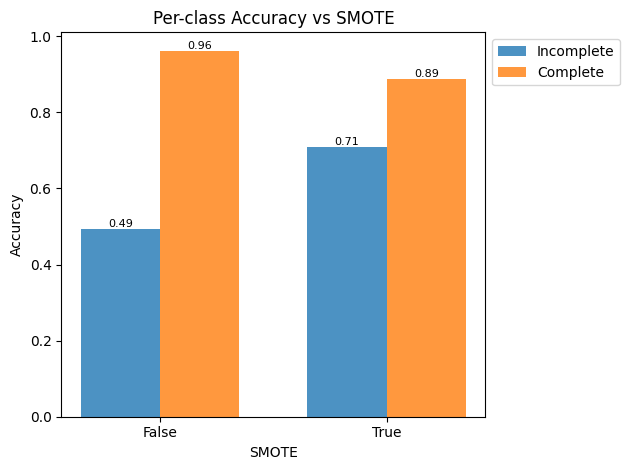

In [62]:
plot_performance_vs_boolean_hyperparameter(should_smote, performance, hyperparameter_name)

#### Grid search over batch size, learning rate, and dropout rate

In [63]:
num_epochs = 15
embedding_dim = 11
weight_decay = 0
smote = True

In [64]:
batch_sizes = [16, 32, 64, 128, 256]
learning_rates = [.0001, .00025, .0005, .00075, .001, .0025, .005, .0075, .01]
dropout_rates = [.1, .2, .3, .4, .5]

In [65]:
bs_perf = []
for batch_size in batch_sizes:
    lr_perf = []
    for learning_rate in learning_rates:
        dr_perf = []
        for dropout_rate in dropout_rates:
            per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
            dr_perf.append(per_class_avg_accuracy)
        lr_perf.append(dr_perf)
    bs_perf.append(lr_perf)

In [66]:
np.save('hyperparameter_search_performance.npy', bs_perf)

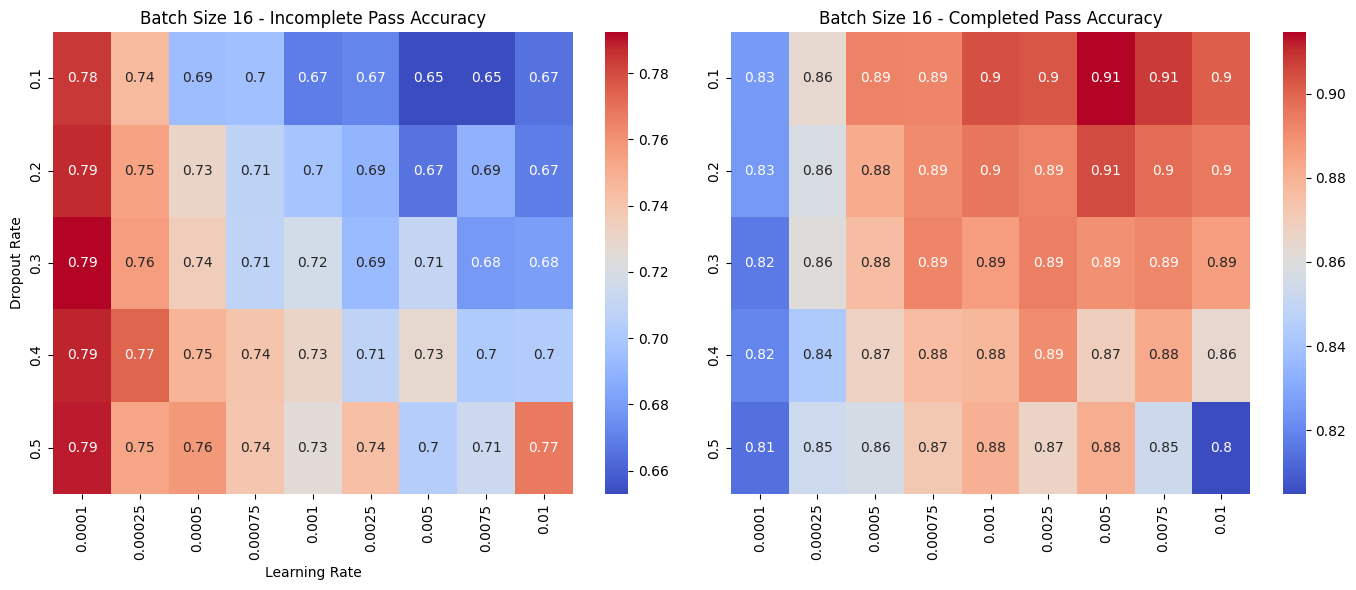

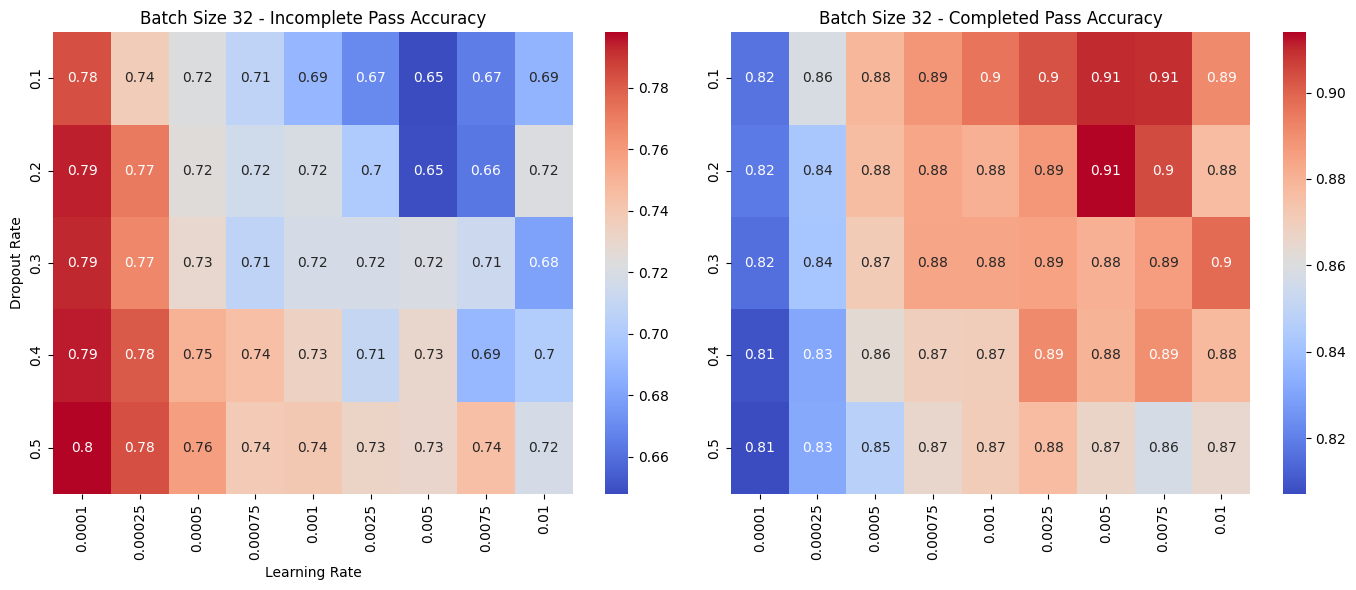

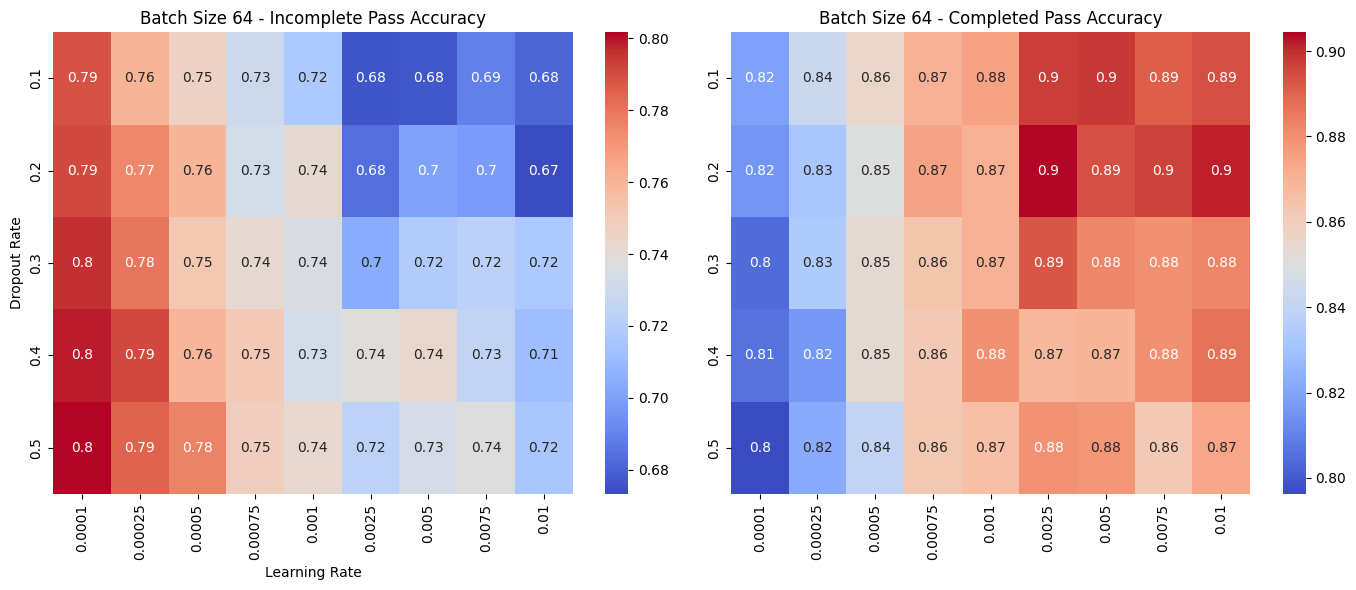

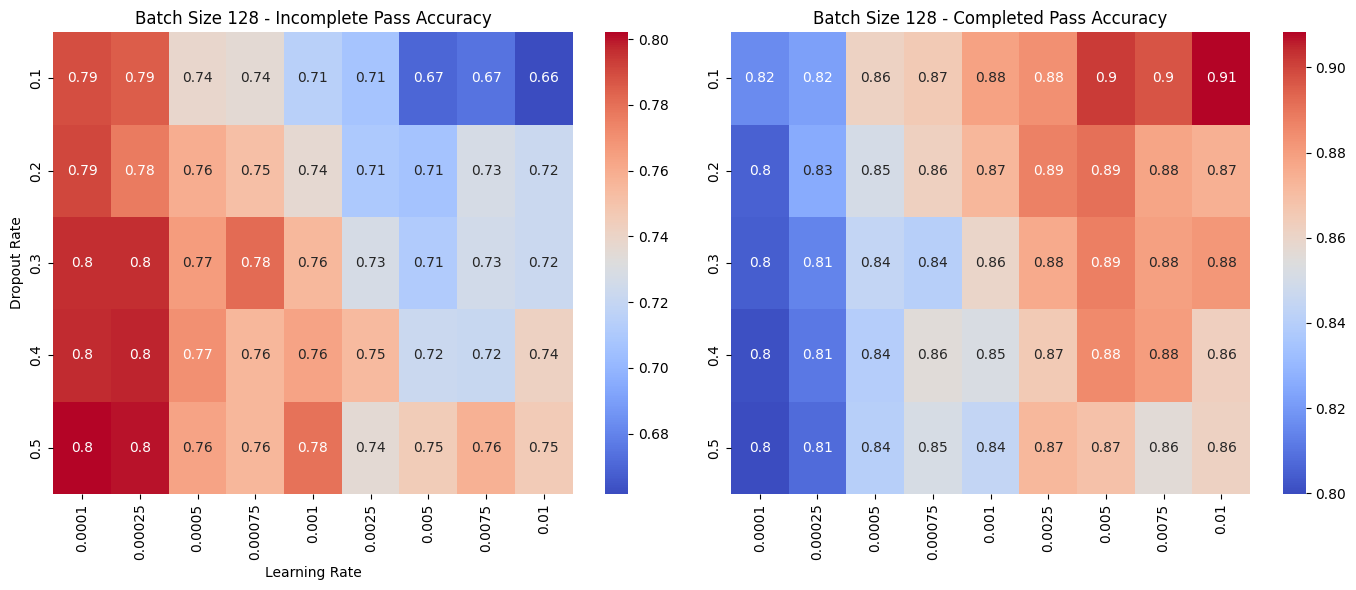

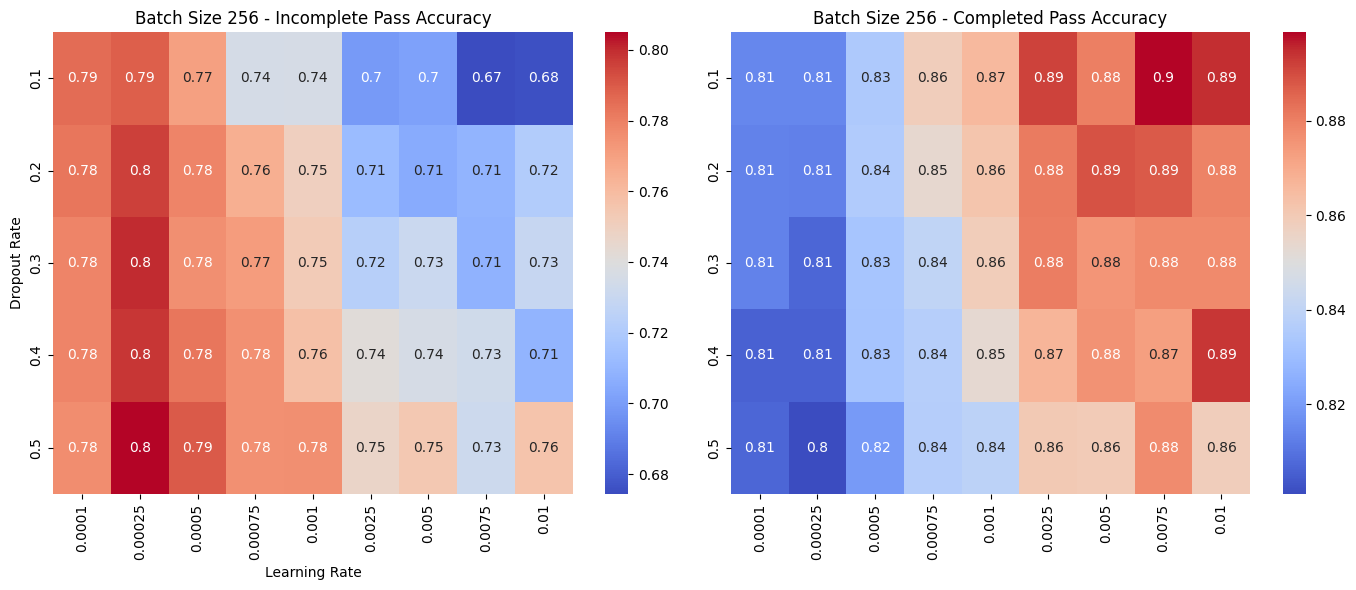

In [70]:
performance = np.load('hyperparameter_search_performance.npy')
for batch_size_index, batch_size in enumerate(batch_sizes):
    plot_side_by_side_heatmaps(performance, batch_size_index, batch_size, learning_rates, dropout_rates)

#### Varying number of epochs

In [72]:
batch_size = 256
embedding_dim = 11
dropout_rate = .4
learning_rate = .00075
weight_decay = 0
smote = True

In [82]:
hyperparameter_name = "Number of epochs"
num_epochs_list = [10, 15, 20, 25, 30, 35, 40]
performance = []
for num_epochs in num_epochs_list:
    per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
    performance.append(per_class_avg_accuracy)

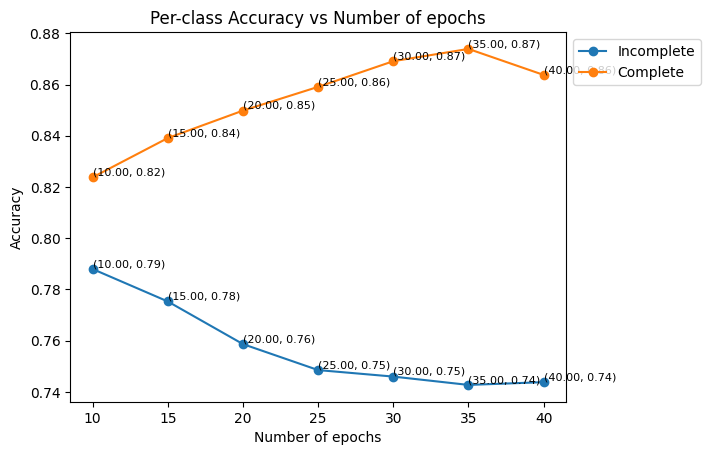

In [83]:
num_decimal_points = 2
plot_performance_vs_hyperparameter(num_epochs_list, performance, hyperparameter_name, num_decimal_points)

#### Varying embedding layer dimensionality

In [84]:
num_epochs = 15
batch_size = 256
dropout_rate = .4
learning_rate = .00075
weight_decay = 0
smote = True

In [100]:
hyperparameter_name = "Embedding dimensionality"
embedding_dimensions = [3, 5, 7, 9, 11, 13, 15]
performance = []
for embedding_dim in embedding_dimensions:
    per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
    performance.append(per_class_avg_accuracy)

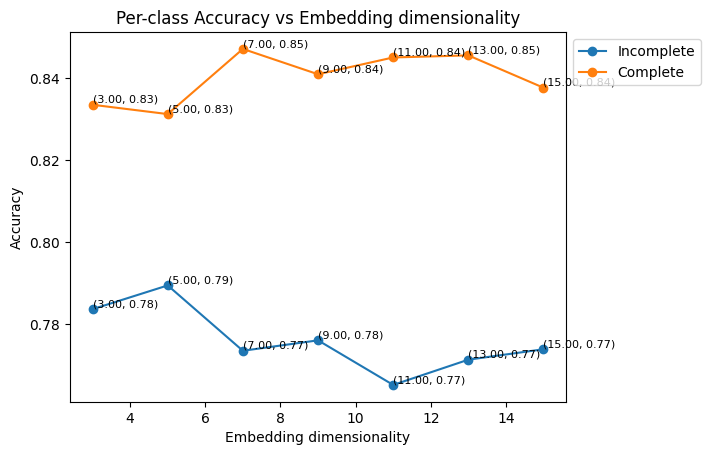

In [101]:
num_decimal_points = 2
plot_performance_vs_hyperparameter(embedding_dimensions, performance, hyperparameter_name, num_decimal_points)

#### Varying amount of weight decay

In [116]:
num_epochs = 15
batch_size = 256
embedding_dim = 13
dropout_rate = .4
learning_rate = .00075
smote = True

In [117]:
hyperparameter_name = "Weight decay"
weight_decays = [0, .001, .0025, .005, .0075, .01]
performance = []
for weight_decay in weight_decays:
    per_class_avg_accuracy = cross_validate(dataset, num_folds, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay, smote)
    performance.append(per_class_avg_accuracy)

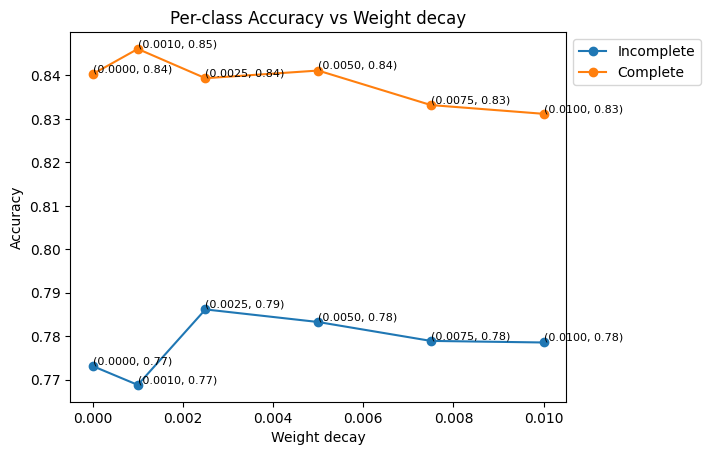

In [118]:
num_decimal_points = 4
plot_performance_vs_hyperparameter(weight_decays, performance, hyperparameter_name, num_decimal_points)

### Building final model

In [119]:
def get_train_loader(dataset, batch_size):
    player_ids_train = dataset.get_player_ids()
    features_train = dataset.get_features().to_numpy()   
    labels_train = dataset.get_labels()        
    player_ids_train, features_train, labels_train = apply_smote_per_player(player_ids_train, features_train, labels_train)
    player_ids_train = torch.tensor(player_ids_train, dtype=torch.long)
    features_train = torch.tensor(features_train, dtype=torch.float32)
    labels_train = torch.tensor(labels_train, dtype=torch.long)
    train_subset = TensorDataset(player_ids_train, features_train, labels_train)
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    float_feature_indxs = get_float_feature_indxs(dataset.get_features())
    scaler = StandardScaler()
    train_loader, scaler = standardize_data_loader(train_loader, float_feature_indxs, scaler, fit=True, shuffle=True)
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    return train_loader

In [120]:
def train_final_model(dataset, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay):
    train_loader = get_train_loader(dataset, batch_size)
    model, optimizer, criterion = get_fresh_model_optimizer_criterion(num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay)
    train(model, optimizer, criterion, train_loader, num_epochs)
    return model

In [121]:
num_epochs = 15
batch_size = 256
embedding_dim = 13
dropout_rate = .4
learning_rate = .00075
weight_decay = .0025

In [122]:
model = train_final_model(dataset, num_epochs, batch_size, num_players, embedding_dim, num_features, output_size, dropout_rate, learning_rate, weight_decay)
torch.save(model.state_dict(), team + '_pass_completion_model.pth')

## Evaluation

### Functions to evaluate model

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

In [49]:
def plot_3d_pca_embeddings(player_embeddings, new_id_to_player, player_to_group, group_colors):  
    player_embeddings = model.player_embedding.weight.data
    pca = PCA(n_components=3)
    reduced_embeddings= pca.fit_transform(player_embeddings.numpy())
    colors = [group_colors[player_to_group[player_name]] for player_name in new_id_to_player.values()]
    fig = plt.figure(figsize=(18, 14))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], reduced_embeddings[:, 2], c=colors, alpha=0.7)
    offset = 0.005
    for i, player_name in enumerate(new_id_to_player.values()):
        ax.text(reduced_embeddings[i, 0] + offset, reduced_embeddings[i, 1] + offset, reduced_embeddings[i, 2] + offset, player_name, size=7)
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    ax.set_title('PCA of Player Embeddings')
    legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                                 markerfacecolor=val, markersize=10) for key, val in group_colors.items()]
    ax.legend(handles=legend_handles, title='Player Positions')

In [5]:
def get_dataset_loader(dataset, batch_size):
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    float_feature_indxs = get_float_feature_indxs(dataset.get_features())
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    data_loader, _ = standardize_data_loader(data_loader, float_feature_indxs, scaler, fit=False, shuffle=False)
    return data_loader

In [6]:
def get_activations(model, data_loader, layer_index, unit_index):
    inputs = []
    activations = []
    model.eval()
    with torch.no_grad():
        for player_ids, features, _ in data_loader:
            player_ids = player_ids.view(-1, 1)
            og_input = torch.cat((player_ids, features), dim=1)
            player_embeddings = model.player_embedding(player_ids).squeeze(1) 
            layer_input = torch.cat((player_embeddings, features), dim=1)
            for name, layer in model.named_modules():
                # if isinstance(layer, (torch.nn.Linear, torch.nn.modules.container.Sequential)):
                if isinstance(layer, torch.nn.Linear):
                    # layer_input = layer(layer_input)
                    if name == layer_index:
                        inputs.append(og_input[0].tolist())
                        layer_output = layer(layer_input)  
                        activation = layer_output[:, unit_index]
                        # activation = layer_input[:, unit_index]
                        activations.append(activation[0].item())
                        break
    return inputs, activations

In [7]:
def get_top_and_bottom_activating_inputs(inputs, activations, num_interested):
    for input, activation in zip(inputs, activations):
        input.append(activation)
    inputs.sort(key=lambda x: x[-1], reverse=True)
    top_activating_inputs = inputs[:num_interested]
    bottom_activating_inputs = inputs[-num_interested:]
    return top_activating_inputs, bottom_activating_inputs

In [8]:
def get_activation_df(dataset, top_activating_inputs, bottom_activating_inputs, new_id_to_player):
    activation_df = pd.DataFrame(columns=dataset.df.columns)
    activation_df.drop(columns=['pass_completed'], inplace=True)
    activation_df['activation'] = 0
    for data in top_activating_inputs:
        activation_df.loc[len(activation_df)] = data
    for data in bottom_activating_inputs:
        activation_df.loc[len(activation_df)] = data
    activation_df = activation_df.rename(columns={'player_id': 'player'})
    activation_df['player'] = activation_df['player'].map(new_id_to_player)
    return activation_df

In [9]:
def visualize_features(dataset, model, batch_size, layer_index, unit_index, num_interested, new_id_to_player):
    data_loader = get_dataset_loader(dataset, batch_size)
    inputs, activations = get_activations(model, data_loader, layer_index, unit_index)
    top_activating_inputs, bottom_activating_inputs = get_top_and_bottom_activating_inputs(inputs, activations, num_interested)
    activation_df = get_activation_df(dataset, top_activating_inputs, bottom_activating_inputs, new_id_to_player)
    return activation_df

In [10]:
def perturbate_features(dataset, model, batch_size):
    model.eval()
    data_loader = get_dataset_loader(dataset, batch_size)
    perturbated_diffs = []
    with torch.no_grad():
        for player_ids, features, labels in data_loader:
            original_logits = model.forward(player_ids, features)
            original_probs = torch.nn.functional.softmax(original_logits, dim=1)
            original_correct_class_probs = original_probs[torch.arange(labels.size(0)), labels]
            num_features = features.shape[1]
            for feature_index in range(num_features):
                perturbated_features = features.clone()
                perturbated_features[:, feature_index] = 0
                perturbated_logits = model(player_ids, perturbated_features)
                perturbated_probs = torch.nn.functional.softmax(perturbated_logits, dim=1)
                perturbated_correct_class_probs = perturbated_probs[torch.arange(labels.size(0)), labels]
                perturbated_diffs.append((original_correct_class_probs - perturbated_correct_class_probs).mean().item())
    return perturbated_diffs

In [11]:
def plot_perturbated_diffs(dataset, perturbated_diffs):
    feature_col_to_perturbation = defaultdict(float)
    for index, column_name in enumerate(dataset.get_features().columns):
        feature_col_to_perturbation[column_name] = perturbated_diffs[index]
    features = list(feature_col_to_perturbation.keys())
    perturbations = list(feature_col_to_perturbation.values())
    plt.figure(figsize=(14, 8))  
    color_map = ['green' if x >= 0 else 'red' for x in perturbations]
    plt.bar(features, perturbations, color=color_map)  
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Perturbated Differences', fontsize=14)
    plt.title('Feature Perturbation Effect', fontsize=16)  
    plt.xticks(rotation=90)
    plt.tight_layout()

In [12]:
def get_avergage_class_saliencies(dataset, model, batch_size):
    model.eval()
    data_loader = get_dataset_loader(dataset, batch_size)
    saliencies = [[], []]
    for player_id, features, label in data_loader:
        features.requires_grad_(True)
        outputs = model(player_id, features)
        for class_index in [0, 1]:
            model.zero_grad()
            class_logit = outputs[0, class_index]   
            class_logit.sum().backward(retain_graph=True)
            feature_saliency = features.grad.abs()  
            saliencies[class_index].append(feature_saliency[0])
    saliencies_class_0 = np.array(saliencies[0])
    saliencies_class_1 = np.array(saliencies[1])
    avg_saliency_class_0 = np.mean(saliencies_class_0, axis=0)
    avg_saliency_class_1 = np.mean(saliencies_class_1, axis=0)
    avg_saliencies = np.stack([avg_saliency_class_0, avg_saliency_class_1], axis=0)
    return avg_saliencies

In [13]:
def plot_average_class_saliencies(dataset, avg_saliencies):
    feature_names = dataset.get_features().columns
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 16))
    titles = ['Feature Saliency for Incomplete Passes', 'Feature Saliency for Complete Passes']
    for class_index in range(avg_saliencies.shape[0]):
        feature_col_to_saliency = defaultdict(float)
        for index, column_name in enumerate(feature_names):
            feature_col_to_saliency[column_name] = avg_saliencies[class_index][index]
        features = list(feature_col_to_saliency.keys())
        saliencies = list(feature_col_to_saliency.values())
        ax = axes[class_index]
        ax.bar(features, saliencies, color='blue')
        ax.set_xlabel('Features', fontsize=14)
        ax.set_ylabel('Average Saliency', fontsize=14)
        ax.set_title(titles[class_index], fontsize=16)
        ax.tick_params(axis='x', rotation=90) 
    plt.tight_layout()

### Setting up evaluation data

In [14]:
team = 'Chelsea'

In [21]:
file = team + '_pass_events.csv'
og_df = pd.read_csv(file)
eval_df = og_df.copy(deep=True)
eval_df.drop(columns=['player', 'position'], inplace=True)
unique_player_ids = pd.unique(eval_df['player_id'])  
old_id_to_new_id = {old_id: new_id for new_id, old_id in enumerate(unique_player_ids)}
eval_df['player_id'] = eval_df['player_id'].map(old_id_to_new_id)
dataset = PassEventsDataset(eval_df)

In [22]:
dataset.df

,player_id,pass_angle,pass_length,under_pressure,pass_cross,pass_cut_back,pass_inswinging,pass_outswinging,pass_through_ball,pass_switch,...,play_pattern_from_keeper,play_pattern_from_kick_off,play_pattern_from_throw_in,play_pattern_regular_play,pass_body_part_left_foot,pass_body_part_right_foot,pass_height_ground_pass,pass_height_high_pass,pass_height_low_pass,pass_completed
0,0,2.099368,14.475496,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
1,1,-0.907969,19.663671,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
2,2,0.993357,15.754364,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
3,0,1.030972,28.794617,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
4,3,-0.620940,16.844286,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18628,6,-0.014319,41.904297,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
18629,1,-0.150122,24.070728,1,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
18630,9,0.273940,66.167210,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
18631,18,0.624023,6.161169,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1


In [23]:
players = og_df[['player', 'player_id', 'position']]
old_id_to_player = dict(zip(players['player_id'], players['player']))
new_id_to_player = {}
for old_id, player in old_id_to_player.items():
    new_id = old_id_to_new_id[old_id]
    new_id_to_player[new_id] = player

In [24]:
new_id_to_player

{0: 'Eden Hazard',
 1: 'Francesc Fàbregas i Soler',
 2: 'Oscar dos Santos Emboaba Júnior',
 3: 'Branislav Ivanović',
 4: 'Gary Cahill',
 5: 'Diego da Silva Costa',
 6: 'César Azpilicueta Tanco',
 7: 'Willian Borges da Silva',
 8: 'Nemanja Matić',
 9: 'Thibaut Courtois',
 10: 'John Terry',
 11: 'Asmir Begović',
 12: 'Kurt Happy Zouma',
 13: 'Ramires Santos do Nascimento',
 14: 'Pedro Eliezer Rodríguez Ledesma',
 15: 'John Michael Nchekwube Obinna',
 16: 'Robert Kenedy Nunes do Nascimento',
 17: 'Ruben Loftus-Cheek',
 18: 'Abdul Rahman Baba'}

In [25]:
position_to_group = {
    'Goalkeeper': 'Goalkeeper',
    'Left Back': 'Defender',
    'Right Back': 'Defender',
    'Center Back': 'Defender',
    'Left Center Back': 'Defender',
    'Right Center Back': 'Defender',
    'Defensive Midfield': 'Midfielder',
    'Left Defensive Midfield': 'Midfielder',
    'Right Defensive Midfield': 'Midfielder',
    'Center Midfield': 'Midfielder',
    'Center Attacking Midfield': 'Midfielder',
    'Left Wing': 'Attacker',
    'Right Wing': 'Attacker',
    'Center Forward': 'Attacker',
}

In [26]:
position_counts = players.groupby(['player', 'position']).size().reset_index(name='counts')
position_counts.sort_values(by=['player', 'counts'], ascending=[True, False], inplace=True)
most_frequent_positions = position_counts.drop_duplicates(subset='player')
player_to_position = dict(zip(most_frequent_positions['player'], most_frequent_positions['position']))
player_to_group = {player: position_to_group.get(position, "Unknown") for player, position in player_to_position.items()}

In [27]:
player_to_group

{'Abdul Rahman Baba': 'Defender',
 'Asmir Begović': 'Goalkeeper',
 'Branislav Ivanović': 'Defender',
 'César Azpilicueta Tanco': 'Defender',
 'Diego da Silva Costa': 'Attacker',
 'Eden Hazard': 'Attacker',
 'Francesc Fàbregas i Soler': 'Midfielder',
 'Gary Cahill': 'Defender',
 'John Michael Nchekwube Obinna': 'Midfielder',
 'John Terry': 'Defender',
 'Kurt Happy Zouma': 'Defender',
 'Nemanja Matić': 'Midfielder',
 'Oscar dos Santos Emboaba Júnior': 'Midfielder',
 'Pedro Eliezer Rodríguez Ledesma': 'Attacker',
 'Ramires Santos do Nascimento': 'Midfielder',
 'Robert Kenedy Nunes do Nascimento': 'Defender',
 'Ruben Loftus-Cheek': 'Midfielder',
 'Thibaut Courtois': 'Goalkeeper',
 'Willian Borges da Silva': 'Attacker'}

In [28]:
num_players = len(np.unique(dataset.get_player_ids()))
embedding_dim = 13
num_features = dataset.get_features().to_numpy().shape[1]
output_size = 2
dropout_rate = .4

In [33]:
model = PassCompletionModel(num_players, embedding_dim, num_features, output_size, dropout_rate)
model.load_state_dict(torch.load(team + '_pass_completion_model.pth'))
model.eval()

PassCompletionModel(
  (player_embedding): Embedding(19, 13)
  (layers): Sequential(
    (0): Linear(in_features=40, out_features=50, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=50, out_features=60, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=60, out_features=70, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.4, inplace=False)
    (9): Linear(in_features=70, out_features=2, bias=True)
  )
)

### Embeddings analysis

In [47]:
player_embeddings = model.player_embedding.weight.data
group_colors = {
    'Attacker': 'blue',
    'Midfielder': 'green',
    'Defender': 'orange',
    'Goalkeeper': 'red'
}

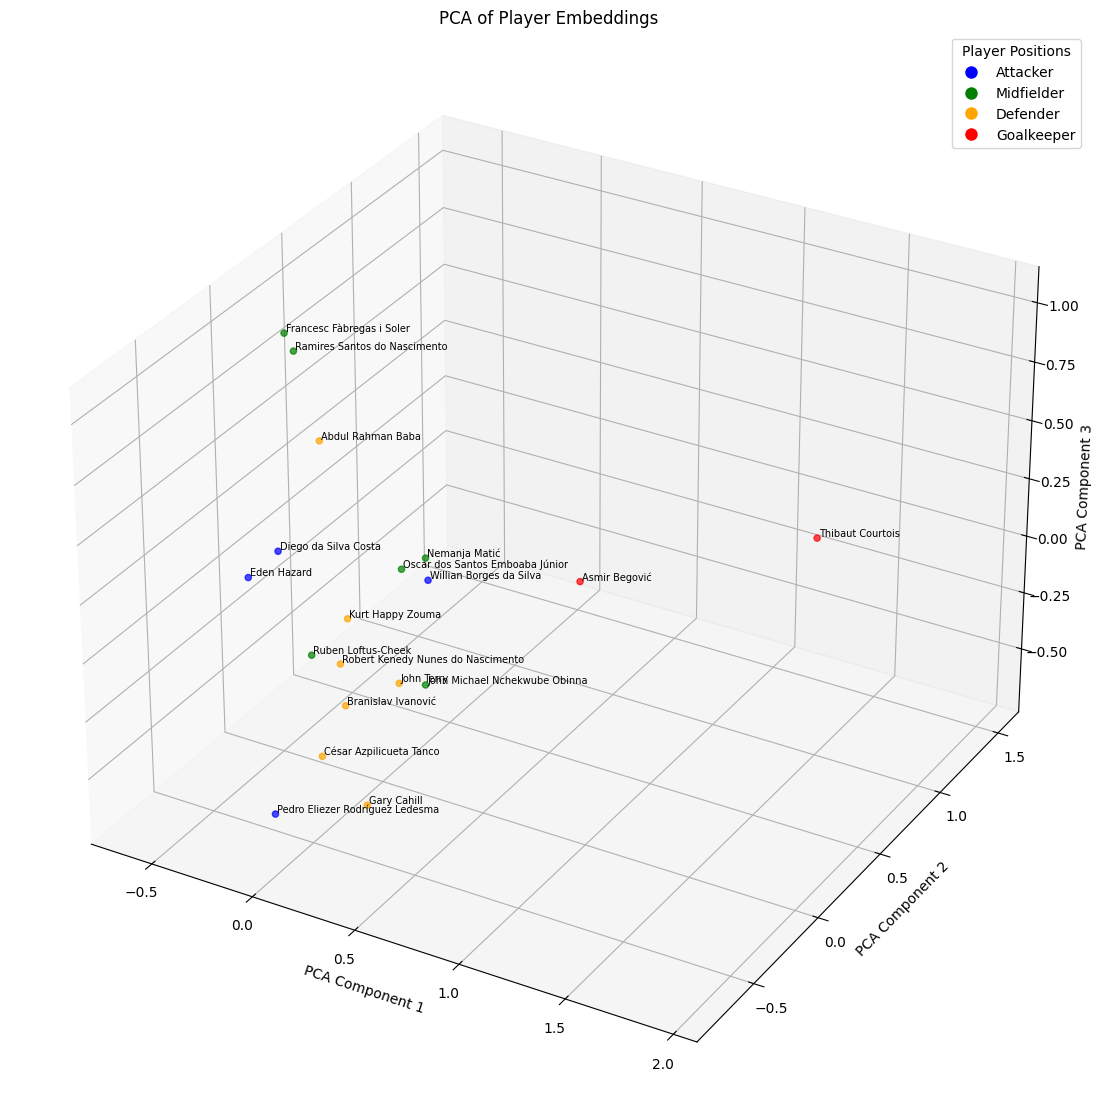

In [50]:
plot_3d_pca_embeddings(player_embeddings, new_id_to_player, player_to_group, group_colors)

### Feature visualization

In [332]:
batch_size = 1
layer_index = 'layers.0'  
unit_index = 10 
num_interested = 10

In [345]:
activation_df = visualize_features(dataset, model, batch_size, layer_index, unit_index, num_interested, new_id_to_player)

In [346]:
activation_df.head(num_interested)

,player,pass_angle,pass_length,under_pressure,pass_cross,pass_cut_back,pass_inswinging,pass_outswinging,pass_through_ball,pass_switch,...,play_pattern_from_keeper,play_pattern_from_kick_off,play_pattern_from_throw_in,play_pattern_regular_play,pass_body_part_left_foot,pass_body_part_right_foot,pass_height_ground_pass,pass_height_high_pass,pass_height_low_pass,activation
0,Thibaut Courtois,0.247498,5.850864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.160160
1,Asmir Begović,-0.013530,5.413223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.150030
2,Thibaut Courtois,-0.200839,5.436189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.134221
3,Asmir Begović,-0.007223,4.901541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.054928
4,Asmir Begović,0.019290,5.082859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.052382
5,Thibaut Courtois,0.098350,5.133836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.048491
6,John Michael Nchekwube Obinna,0.006567,4.482960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.044934
7,César Azpilicueta Tanco,-0.331185,5.775124,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.036970
8,Asmir Begović,-0.016594,4.711899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.017302
9,Thibaut Courtois,-0.149041,4.661811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.002612


In [347]:
activation_df.tail(num_interested)

,player,pass_angle,pass_length,under_pressure,pass_cross,pass_cut_back,pass_inswinging,pass_outswinging,pass_through_ball,pass_switch,...,play_pattern_from_keeper,play_pattern_from_kick_off,play_pattern_from_throw_in,play_pattern_regular_play,pass_body_part_left_foot,pass_body_part_right_foot,pass_height_ground_pass,pass_height_high_pass,pass_height_low_pass,activation
10,Francesc Fàbregas i Soler,1.464888,-1.099511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.415007
11,Francesc Fàbregas i Soler,1.840257,-0.642462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.417828
12,Francesc Fàbregas i Soler,1.999412,-1.042925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.420969
13,Francesc Fàbregas i Soler,1.525328,-1.145914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.425386
14,Francesc Fàbregas i Soler,2.028220,-1.097633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.425658
15,Francesc Fàbregas i Soler,1.601759,-1.053294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.427616
16,Francesc Fàbregas i Soler,1.889279,-0.836699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.427954
17,Francesc Fàbregas i Soler,1.919536,-1.269521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,-0.433965
18,Francesc Fàbregas i Soler,1.997228,-0.807889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.451398
19,Francesc Fàbregas i Soler,2.033666,-0.917258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.455231


### Feature perturbation

In [462]:
batch_size = len(dataset.df)

In [463]:
perturbated_diffs = perturbate_features(dataset, model, batch_size)

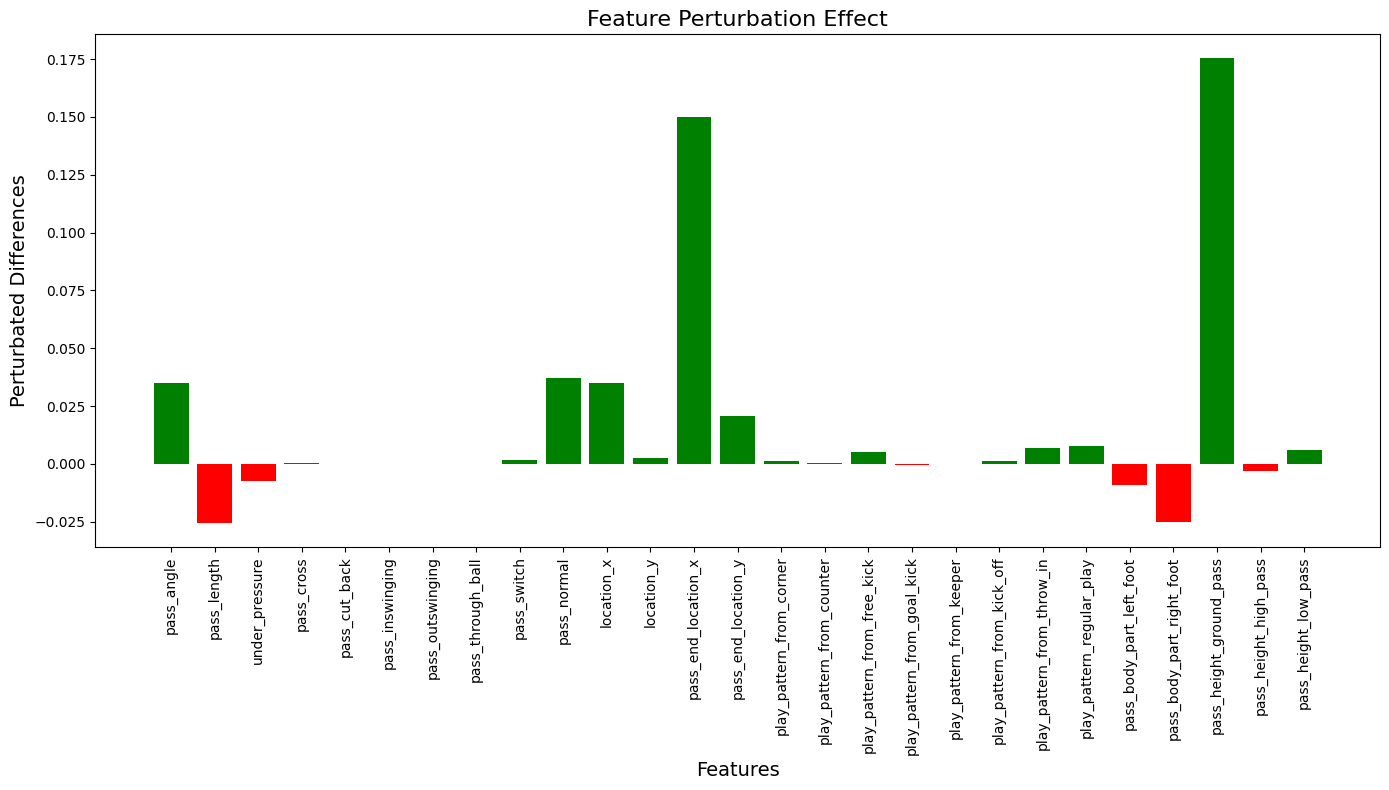

In [464]:
plot_perturbated_diffs(dataset, perturbated_diffs)

### Gradient attribution

In [465]:
batch_size = 1

In [466]:
avg_saliencies = get_avergage_class_saliencies(dataset, model, batch_size)

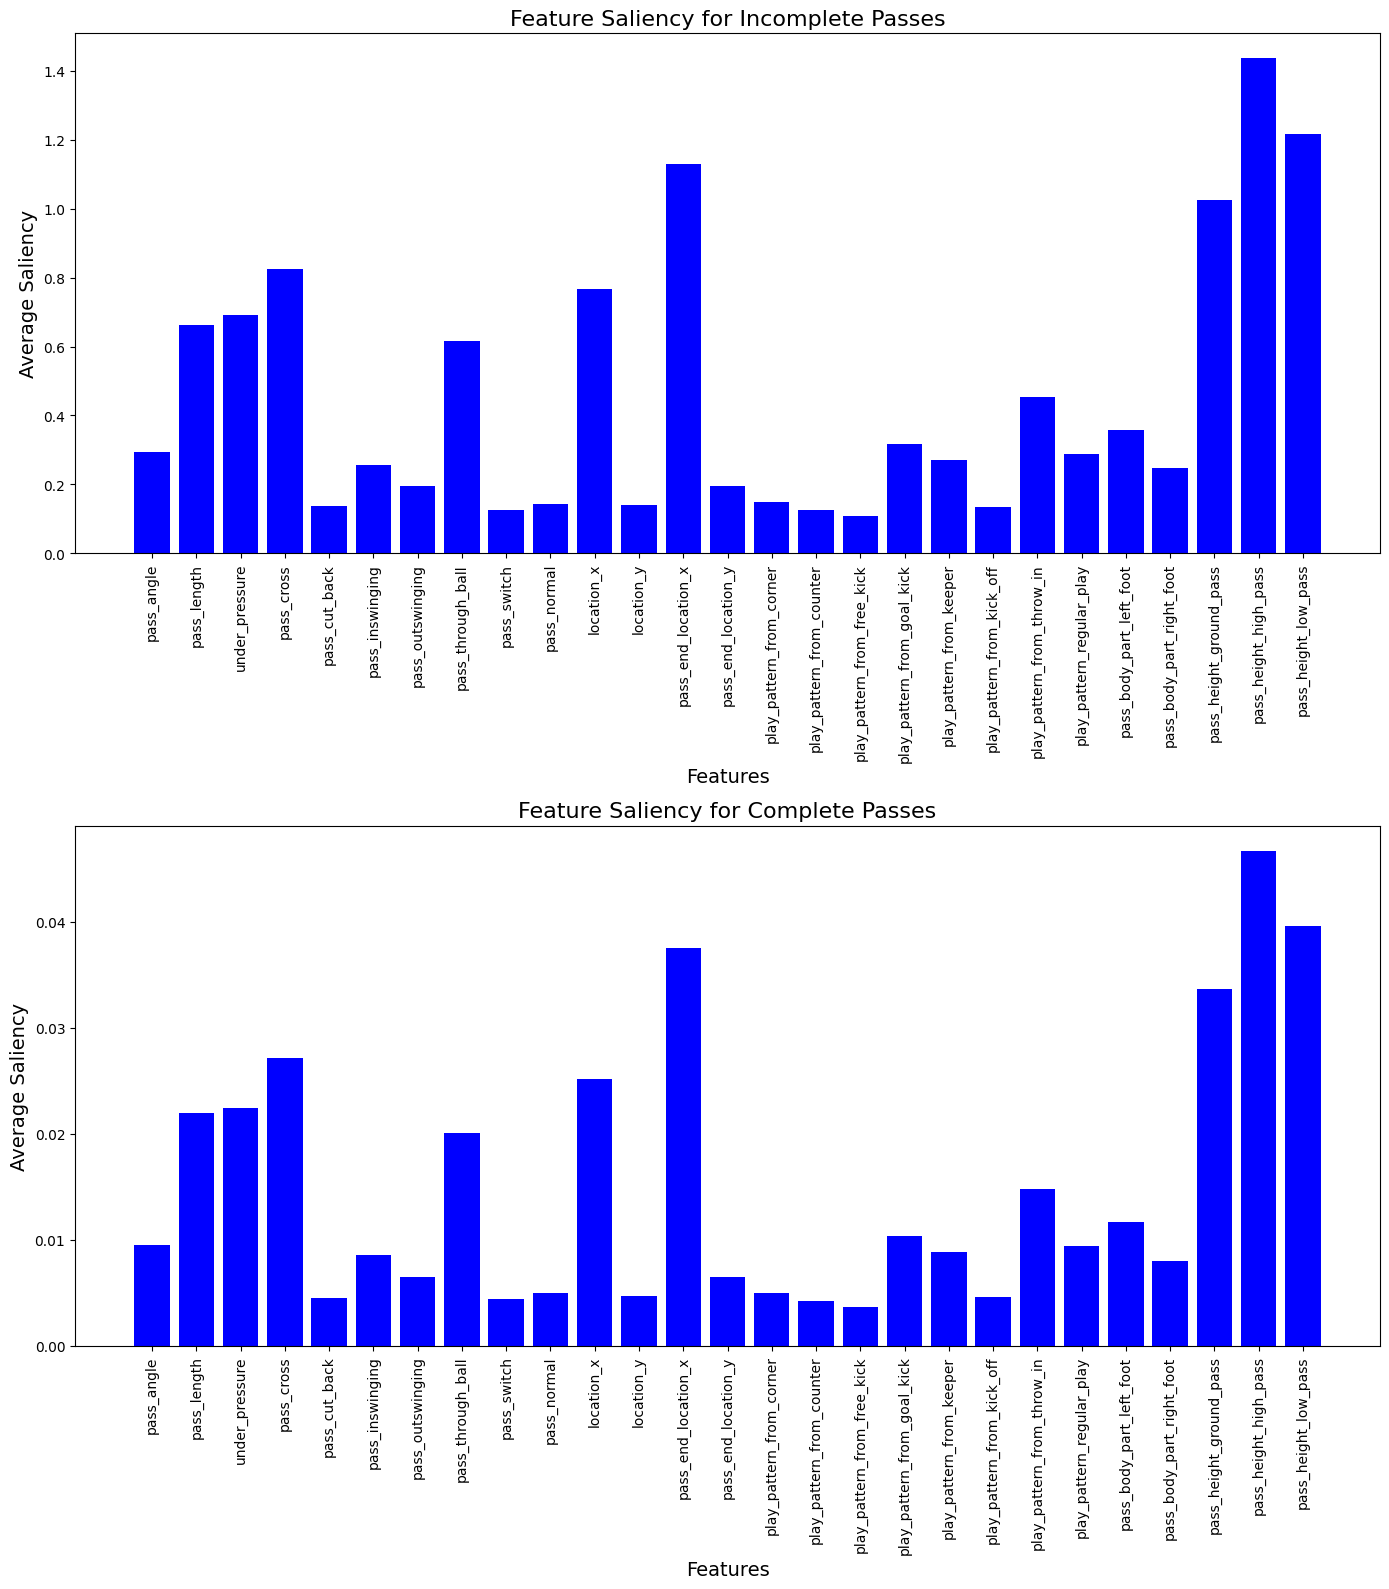

In [467]:
plot_average_class_saliencies(dataset, avg_saliencies)